# 1.  Demo Classification surface testing

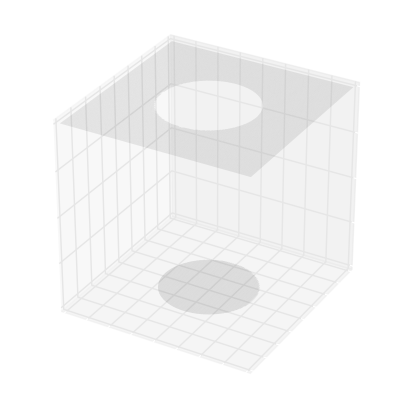

In [6]:
#!/usr/bin/env python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')
        
r = np.linspace(-2,2,1000)    
s,t = np.meshgrid(r,r)
z = s*s + t*t - 1
z = np.sign(z)
z1 = z.copy()
z2 = z.copy()
z1.shape = (np.prod(np.shape(z)),1)
z2.shape = (np.prod(np.shape(z)),1)

# to plot the step function, plot the bottom and top steps separately - z1 and z2
ind = np.argwhere(z1 < 1)
ind = [v[0] for v in ind]
z1[ind] = np.nan
z1.shape = (np.shape(s))

ind = np.argwhere(z2 > -1)
ind = [v[0] for v in ind]
z2[ind] = np.nan
z2.shape = (np.shape(s))

# plot two surfaces - top and bottom steps
ax1.plot_surface(s,t,z1,alpha = 0.1,color = '#696969',zorder = 0,shade = True,linewidth=0)
ax1.plot_surface(s,t,z2,alpha = 0.1,color = 'k',zorder = 0,shade = True,linewidth=0)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# Get rid of the spines on the 3d plot
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

# 2.  Regression surface demo

In [180]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.animation as animation
from JSAnimation import IPython_display
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.kernel_ridge import KernelRidge
import math

class two_dim_regression_fits:
    def __init__(self):
        self.X = 0
        self.y = 0
        self.x_surf = 0
        self.y_surf = 0
        self.z_surf = 0
        self.regressor = 0
    
    def load_data(self):
        # make points
#         num_pts = 75
#         X = np.random.rand(num_pts,2)
#         y = np.sin(2*np.pi*X[:,0]) + 0.1*np.random.randn(num_pts)
#         y.shape = (len(y),1)
        
#         # create underlying surface
#         r = np.linspace(0,1,500)    
#         s,t = np.meshgrid(r,r)
#         s.shape = (np.prod(np.shape(s)),1)
#         t.shape = (np.prod(np.shape(t)),1)
#         z_surf = np.sin(2*np.pi*s)
        
#         # save everything
#         data = np.concatenate((X,y), axis = 1)
#         data = pd.DataFrame(data)
#         data.to_csv('3d_noisy_sin_sample.csv',index = None)
        
#         true_func = np.concatenate((s,t,z_surf),axis = 1)
#         true_func = pd.DataFrame(true_func)
#         true_func.to_csv('3d_sin_function.csv',index = None)

        # load data
        data = np.asarray(pd.read_csv('3d_noisy_sin_sample.csv'))  
        X = data[:,0:-1]
        y = data[:,-1]
        
        # load underlying function
        true_func = np.asarray(pd.read_csv('3d_sin_function.csv'))
        s = true_func[:,0]
        dim = int(math.sqrt(len(s)))
        s.shape = (dim,dim)
        t = true_func[:,1]
        t.shape = (dim,dim)
        z_surf = true_func[:,2]
        z_surf.shape = (dim,dim)
        
        # return globals
        self.X = X
        self.y = y
        self.x_surf = s
        self.y_surf = t
        self.z_surf = z_surf

    # browse poly fit values
    def browse_poly_fit(self):
        # convert globals
        X = self.X 
        y = self.y 
        s = self.x_surf 
        t =  self.y_surf 
        z_surf = self.z_surf
        
        # create input for classifier surface fit
        s_copy = np.asarray(s.copy())
        s_copy.shape = (np.prod(np.shape(s_copy)),1)
        t_copy = np.asarray(t.copy())
        t_copy.shape = (np.prod(np.size(t_copy)),1)
        h = np.concatenate((s_copy,t_copy),axis = 1)
        
        #### plot everything ###
        # produce figure
        fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(111,projection = '3d')
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure
        
        def show_fit(step):
            ax1.cla()
            ax1.axis('tight')
            
            ### plot all input data ###
            # plot points
            ax1.scatter(X[:,0],X[:,1],y,s = 50,color = 'k',edgecolor = 'w')

            # plot target surface
            artist = ax1.plot_surface(s,t,z_surf,alpha = 0.05,color = 'r',zorder = 0,shade = True,linewidth = 0)

            ### plot fit ###
            self.regressor  = KernelRidge(kernel = 'poly',degree = step+1,alpha = 0)
            
            self.regressor.fit(X,y)
            z_output = self.regressor.predict(h)
            z_output.shape = (np.shape(s))
            ax1.plot_surface(s,t,z_output,alpha = 0.1,color = 'b',zorder = 0,shade = True,linewidth=0.5,antialiased = True,cstride = 50, rstride = 50)

            ### clean up plot ###
            ax1.set_title('tree fit with ' + str(step+1) + ' basis elements')
            
            # turn off tick labels
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_zticklabels([])

            # Get rid of the spines on the 3d plot
            ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

            # turn off tick marks
            ax1.xaxis.set_tick_params(size=0,color = 'w')
            ax1.yaxis.set_tick_params(size=0,color = 'w')
            ax1.zaxis.set_tick_params(size=0,color = 'w')
            
            # set limits
            ax1.set_xlim([-0.05,1.05])
            ax1.set_ylim([-0.05,1.05])
            ax1.set_zlim([-1.1,1.1])

            # set viewing angle
            ax1.view_init(10,-70)        

            return artist,
           
        anim = animation.FuncAnimation(fig, show_fit,frames=10, interval=10, blit=True)
        
        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = 10)
        
        return(anim)
        
    # browse neural net values
    def browse_net_fit(self):
        # convert globals
        X = self.X 
        y = self.y 
        s = self.x_surf 
        t =  self.y_surf 
        z_surf = self.z_surf
        
        # create input for classifier surface fit
        s_copy = np.asarray(s.copy())
        s_copy.shape = (np.prod(np.shape(s_copy)),1)
        t_copy = np.asarray(t.copy())
        t_copy.shape = (np.prod(np.size(t_copy)),1)
        h = np.concatenate((s_copy,t_copy),axis = 1)
        
        #### plot everything ###
        # produce figure
        fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(111,projection = '3d')
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure
        
        def show_fit(step):
            ax1.cla()
            ax1.axis('tight')
            
            ### plot all input data ###
            # plot points
            ax1.scatter(X[:,0],X[:,1],y,s = 50,color = 'k',edgecolor = 'w')

            # plot target surface
            artist = ax1.plot_surface(s,t,z_surf,alpha = 0.05,color = 'r',zorder = 0,shade = True,linewidth = 0)

            ### plot fit ###
            self.regressor = MLPRegressor(solver = 'lbfgs',alpha = 0,activation = 'tanh',random_state = 1,hidden_layer_sizes = (step+1,step+1))
            
            self.regressor.fit(X,y)
            z_output = self.regressor.predict(h)
            z_output.shape = (np.shape(s))
            ax1.plot_surface(s,t,z_output,alpha = 0.1,color = 'b',zorder = 0,shade = True,linewidth=0.5,antialiased = True,cstride = 50, rstride = 50)

            ### clean up plot ###
            ax1.set_title('tree fit with ' + str(step+1) + ' basis elements')
            
            # turn off tick labels
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_zticklabels([])

            # Get rid of the spines on the 3d plot
            ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

            # turn off tick marks
            ax1.xaxis.set_tick_params(size=0,color = 'w')
            ax1.yaxis.set_tick_params(size=0,color = 'w')
            ax1.zaxis.set_tick_params(size=0,color = 'w')
            
            # set limits
            ax1.set_xlim([-0.05,1.05])
            ax1.set_ylim([-0.05,1.05])
            ax1.set_zlim([-1.1,1.1])

            # set viewing angle
            ax1.view_init(10,-70)        

            return artist,
           
        anim = animation.FuncAnimation(fig, show_fit,frames=20, interval=20, blit=True)
        
        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = 20)
        
        return(anim)
    
    # browse tree values
    def browse_tree_fit(self):
        # convert globals
        X = self.X 
        y = self.y 
        s = self.x_surf 
        t =  self.y_surf 
        z_surf = self.z_surf
        
        # create input for classifier surface fit
        s_copy = np.asarray(s.copy())
        s_copy.shape = (np.prod(np.shape(s_copy)),1)
        t_copy = np.asarray(t.copy())
        t_copy.shape = (np.prod(np.size(t_copy)),1)
        h = np.concatenate((s_copy,t_copy),axis = 1)
        
        #### plot everything ###
        # produce figure
        fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(111,projection = '3d')
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)   # remove whitespace around 3d figure
        
        def show_fit(step):
            ax1.cla()
            ax1.axis('tight')
            
            ### plot all input data ###
            # plot points
            ax1.scatter(X[:,0],X[:,1],y,s = 50,color = 'k',edgecolor = 'w')

            # plot target surface
            artist = ax1.plot_surface(s,t,z_surf,alpha = 0.05,color = 'r',zorder = 0,shade = True,linewidth = 0)

            ### plot fit ###
            self.regressor = GradientBoostingRegressor(n_estimators=step+1, learning_rate=1,max_depth=1, random_state=0, loss='ls')
            self.regressor.fit(X,y)
            z_output = self.regressor.predict(h)
            z_output.shape = (np.shape(s))
            ax1.plot_surface(s,t,z_output,alpha = 0.1,color = 'b',zorder = 0,shade = True,linewidth=0.5,antialiased = True,cstride = 50, rstride = 50)

            ### clean up plot ###
            ax1.set_title('tree fit with ' + str(step+1) + ' basis elements')
            
            # turn off tick labels
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            ax1.set_zticklabels([])

            # Get rid of the spines on the 3d plot
            ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
            ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

            # turn off tick marks
            ax1.xaxis.set_tick_params(size=0,color = 'w')
            ax1.yaxis.set_tick_params(size=0,color = 'w')
            ax1.zaxis.set_tick_params(size=0,color = 'w')
            
            # set limits
            ax1.set_xlim([-0.05,1.05])
            ax1.set_ylim([-0.05,1.05])
            ax1.set_zlim([-1.1,1.1])

            # set viewing angle
            ax1.view_init(10,-70)        

            return artist,
           
        anim = animation.FuncAnimation(fig, show_fit,frames=20, interval=20, blit=True)
        
        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = 20)
        
        return(anim)


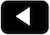
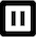
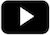
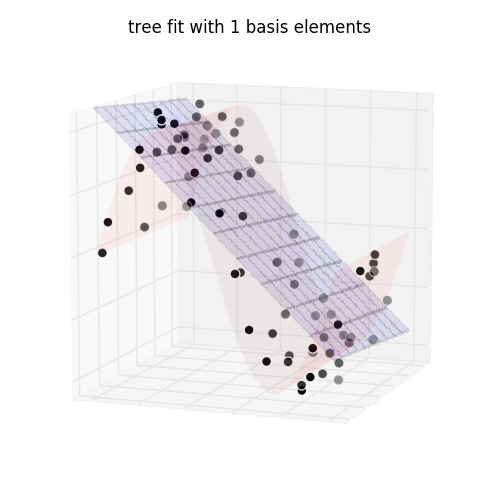
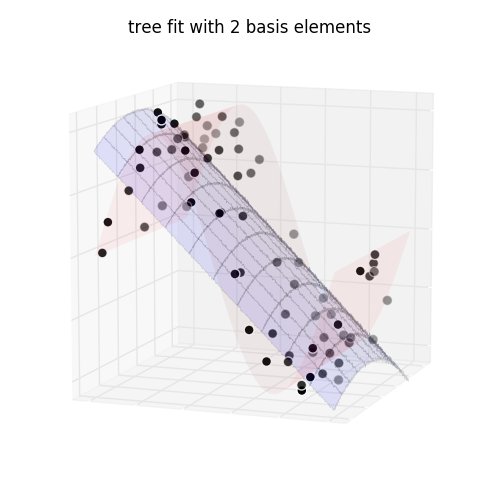
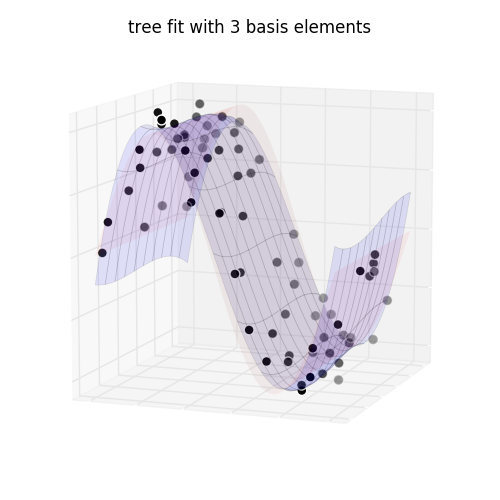
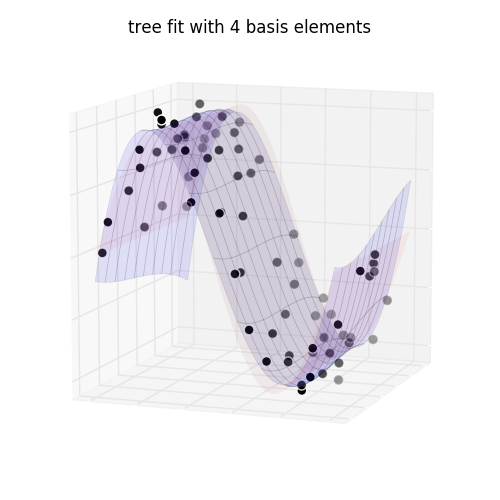
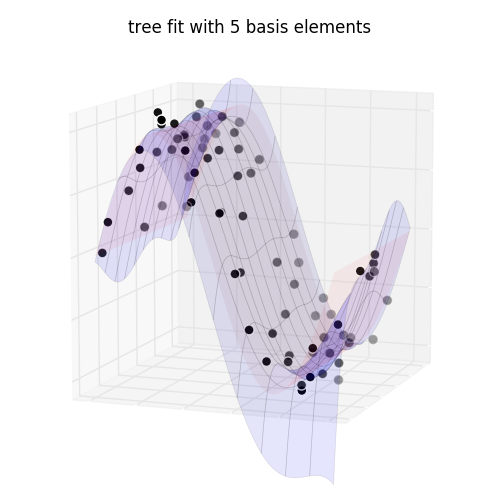
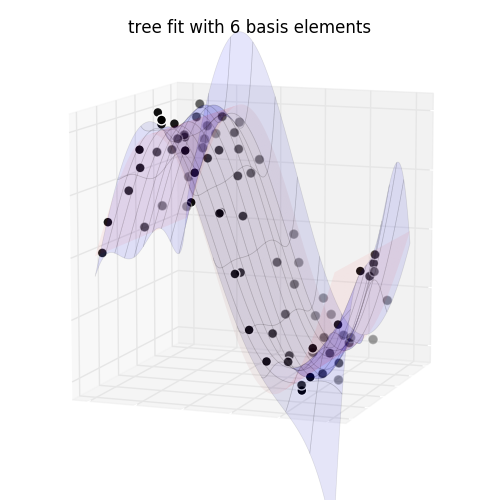
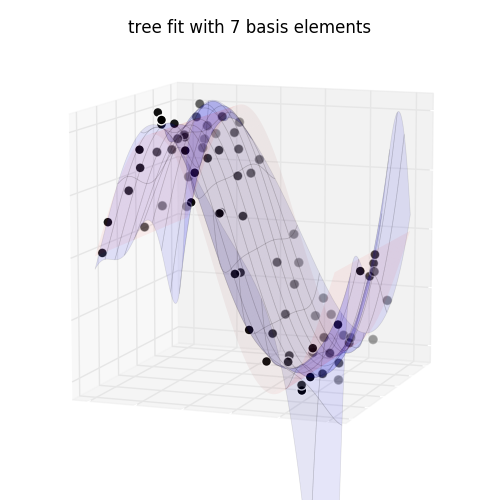
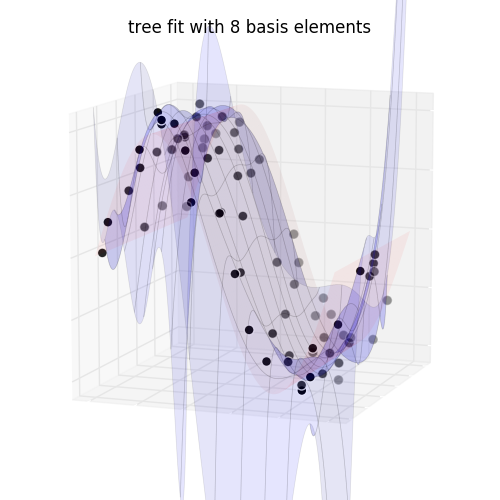
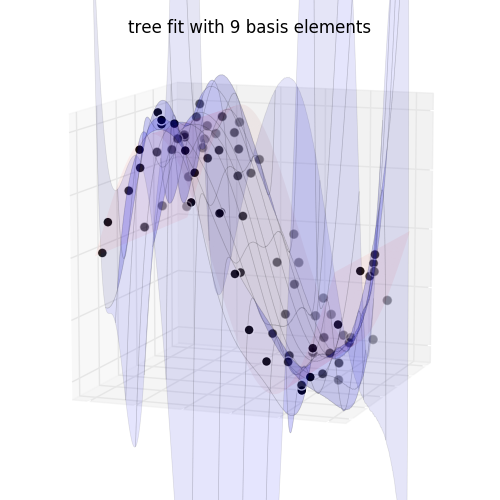
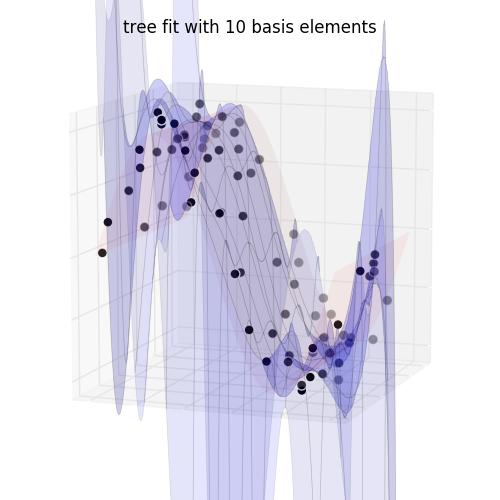

In [181]:
a = two_dim_regression_fits()
a.load_data()
a.browse_poly_fit()